<a href="https://colab.research.google.com/github/JacksonGodbersen/ME592/blob/main/ME592HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ME 592 Homework 1
Jackson Godbersen

# Part 1

In [ ]:
import torchvision
import torch
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader
from torchvision.transforms import v2
!pip install einops
from einops import rearrange

In [ ]:
#Creates mnist_dataset and a subset of 1000 samples
mnist_dataset = torchvision.datasets.MNIST('/files/', download=True)

images, labels = mnist_dataset.data, mnist_dataset.targets

subset = images[:1000]

subset_labels = labels[:1000]

combined_subset = [images, labels][:1000]

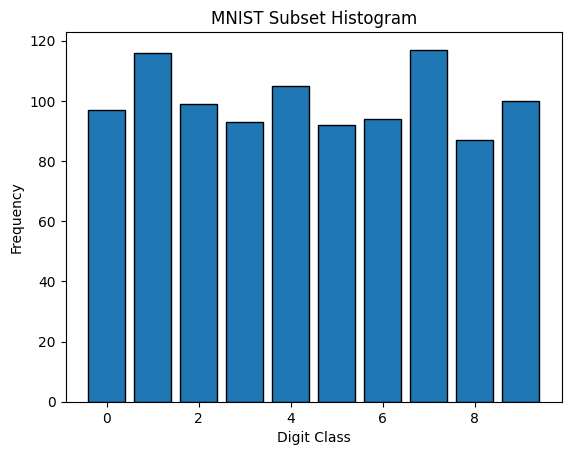

In [ ]:
#Makes a histogram with each class representing the number of times a digit occurs
plt.hist(subset_labels, bins=range(11), align='left', rwidth=0.8, edgecolor='black')
plt.xlabel('Digit Class')
plt.ylabel('Frequency')
plt.title('MNIST Subset Histogram')
plt.show()

In [ ]:
#Reshapes the array to include batches
pattern = "(batch_size num_batches a) b c -> num_batches batch_size a b c"
a = rearrange(subset, pattern, num_batches=1000//25, batch_size = 25)
print(a.shape)


torch.Size([40, 25, 1, 28, 28])


In [ ]:
#Chooses indices for a random batch and a random image from the batch
random_batch = random.randint(0, 40)
random_img = random.randint(0, 25)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


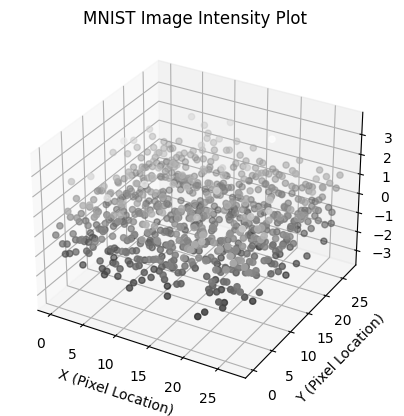

In [ ]:
#Creates 3d plot with the z axis representing intensity

image_tensor = a[random_batch][random_img]

image_tensor = torch.randn(28, 28)

image_array = image_tensor.numpy()

intensity_values = image_tensor.flatten()

x, y = torch.meshgrid(torch.arange(28), torch.arange(28))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x.flatten(), y.flatten(), intensity_values, c=intensity_values, cmap='gray')
ax.set_xlabel('X (Pixel Location)')
ax.set_ylabel('Y (Pixel Location)')
ax.set_zlabel('Intensity')
plt.title('MNIST Image Intensity Plot')
plt.show()


# Part 2


In [ ]:
#Reads the energy data into a pandas dataframe
df = pd.read_csv("/content/energydata_complete.csv")

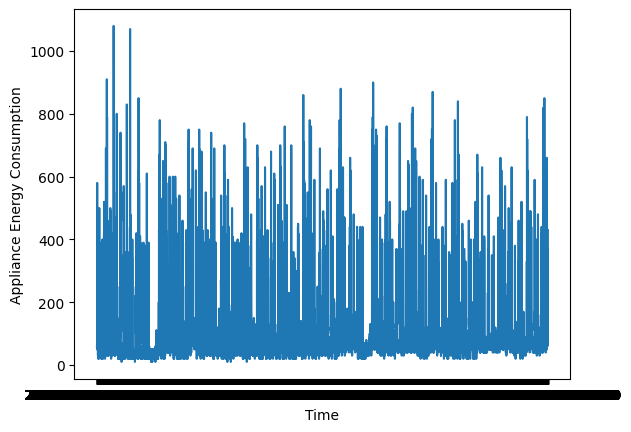

In [ ]:
#Plots the appliance energy consumption over time
plt.xlabel('Time')
plt.ylabel('Appliance Energy Consumption')
plt.plot(df["date"], df["Appliances"])

In [ ]:
df['date'] = pd.to_datetime(df['date'])
TimeSpan = range(len(df))


In [ ]:
#Creates an array to find the sum at each hour and day. Then divides by the count array to find the average.

date=df["date"]
app = df["Appliances"]


sum_list = np.zeros((24, 7))
count_list = np.zeros((24,7))
for i in TimeSpan:
  sum_list[date.dt.hour[i]][date.dt.dayofweek[i]] += app[i]
  count_list[date.dt.hour[i]][date.dt.dayofweek[i]] += 1

day_list = sum_list/count_list

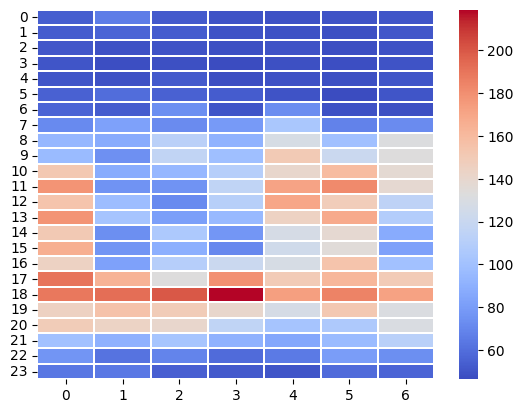

In [ ]:
#Creates a heatmap with the x axis representing the day of week starting with Sunday.
#The y axis represents hour of the day
ax = sns.heatmap(day_list, linewidth=.2, cmap='coolwarm')
plt.show()

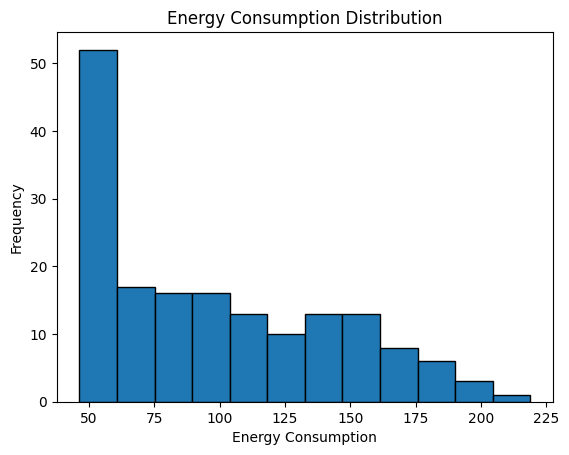

In [ ]:
#Creates a histogram of levels of energy consumption
values_flat = np.array(day_list).flatten()

plt.hist(values_flat, bins=12, edgecolor = "black")
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Energy Consumption Distribution')

plt.show()

In [ ]:
#Calculates the amount of seconds from zero and stores the values
NSM = (df['date'].dt.hour * 3600 + df['date'].dt.minute * 60 + df['date'].dt.second)[TimeSpan]


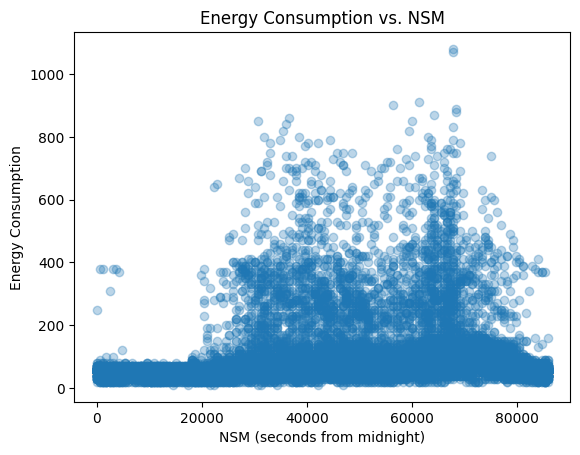

In [ ]:
#Creates a scatterplot of energy consumption vs seconds from midnight
#Increases transparency of points
plt.scatter(NSM, df["Appliances"][TimeSpan], alpha = .3)
plt.xlabel('NSM (seconds from midnight)')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption vs. NSM')
plt.show()

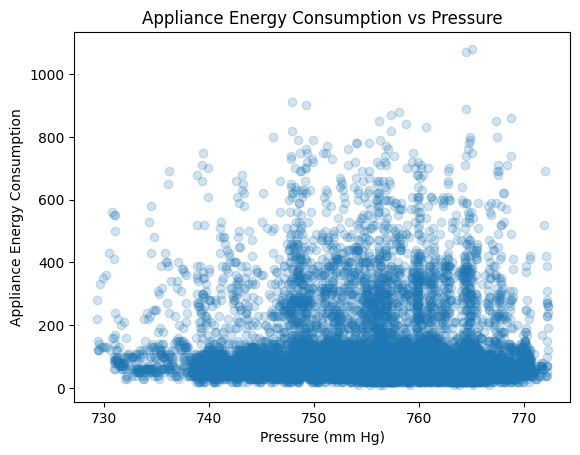

In [ ]:
#Creates a scatterplot of energy consumption vs pressure
#Increases transparency of points
plt.scatter(df["Press_mm_hg"], df['Appliances'], alpha = .2)
plt.xlabel("Pressure (mm Hg)")
plt.ylabel("Appliance Energy Consumption")
plt.title("Appliance Energy Consumption vs Pressure");

Appliance energy consumption is greater with higher pressures. This is likely due to the fact that higher pressures are associated with higher temperatures. This would result in a greater need for energy input into certain appliances such as refrigerators to combat the heat during high pressure times.

Energy consumption varies across the day because of people's daily routines. The first peak is close to noon. Many people go home over their lunch break and appliance energy would increase due to a variety of reasons including lighting and refrigeration. The second peak likely is caused by people consuming energy during cooking and watching tv in the evening. The times when people generally sleep and are at work to a lesser extent have very low energy consumption.

# Part 3


In [ ]:
df = pd.read_csv("/content/airfoil_self_noise.dat", header=None, sep='\t')
df.columns = ['Frequency', 'Angle', 'Chord', 'Velocity', 'Thickness', 'Sound Pressure']

stats = pd.DataFrame({
    "Mean": df.mean(),
    "Variance": df.var(),
    "Standard Deviation": df.std(),
    "Median": df.median(),
    "Kurtosis": df.kurtosis(),
    "Skewness": df.skew(),
    "Range": df.max() - df.min()
})

print("Descriptive statistics for input variables:")
print(stats)

Descriptive statistics for input variables:
                       Mean      Variance  Standard Deviation       Median  \
Frequency       2886.380572  9.938717e+06         3152.573137  1600.000000   
Angle              6.782302  3.502424e+01            5.918128     5.400000   
Chord              0.136548  8.749868e-03            0.093541     0.101600   
Velocity          50.860745  2.425116e+02           15.572784    39.600000   
Thickness          0.011140  1.729287e-04            0.013150     0.004957   
Sound Pressure   124.835943  4.759146e+01            6.898657   125.721000   

                Kurtosis  Skewness         Range  
Frequency       5.708685  2.137084  19800.000000  
Angle          -0.412951  0.689164     22.200000  
Chord          -1.037964  0.457457      0.279400  
Velocity       -1.563951  0.235852     39.600000  
Thickness       2.218903  1.702165      0.058011  
Sound Pressure -0.314187 -0.418952     37.607000  
